Importing

In [17]:
import torch
from torch.optim import Adamax
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


Function to Model

In [18]:
#f
def f(x):
    y = -5*x**3 + x**2 + x + 2
    return y

#f'
def f_1(x):
    y = -15*x**2 + 2*x + 1
    return y


Sampling from defined function

In [19]:
# number of samples
num = 100
# size of sampling and input layer
len = 1

#sample from 0 to 10
X_sample = np.random.rand()*10

for i in range(num-1):
    #appending more samples
    X_sample = np.append(X_sample, np.random.rand()*10)

Y_sample =  f(X_sample)

#converting to tensor
X_sample = torch.from_numpy(X_sample).float().view(-1,1)
Y_sample = torch.from_numpy(Y_sample).float().view(-1,1)


Defining the Model, Loss and Optimizer

In [20]:
#len i/o nodes, i_len nodes per layer and ELU activation fn
i_len = 30

model = nn.Sequential(
    nn.Linear(len, i_len),
    nn.ELU(),
    nn.Linear(i_len, i_len),
    nn.ELU(),
    nn.Linear(i_len, i_len),
    nn.ELU(),
    nn.Linear(i_len, len)
    )

# loss function using mean squared error
loss_fn = nn.MSELoss()

# Adamax optimiser
optim = Adamax(model.parameters())


Graphing model accuracy

In [21]:
#plot function over lower (l) to upper (u), with title (t), with bool (s) to display samples.
def plot(l,u,t,s):
    n_step = 1000

    X_plot = np.linspace(l,u, n_step)
    Y_plot = f(X_plot)

    X_temp = torch.from_numpy(X_plot).float().view(-1,1)
    Y_temp = torch.from_numpy(Y_plot).float().view(-1,1)

    Y_preds = model(X_temp)
    Y_pred_plot = torch.reshape(Y_preds, (-1,)).detach().numpy()

    loss_plot = loss_fn(Y_preds, Y_temp)
    
    if s:
        plt.plot(X_plot, Y_plot, X_plot, Y_pred_plot, X_sample, Y_sample, 'o',markersize=3)
        plt.legend(['Function to Model','CNN Approximation','Samples'])
    else:
        plt.plot(X_plot, Y_plot, X_plot, Y_pred_plot)
        plt.legend(['Function to Model','CNN Approximation'])

    title = t + f"Epoch {epoch}, Loss {loss_plot:.2E}"
    plt.title(title)
    plt.show()
    plt.clf()

Training the Model

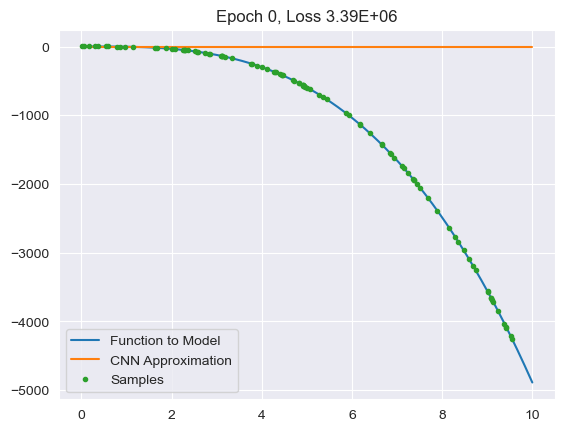

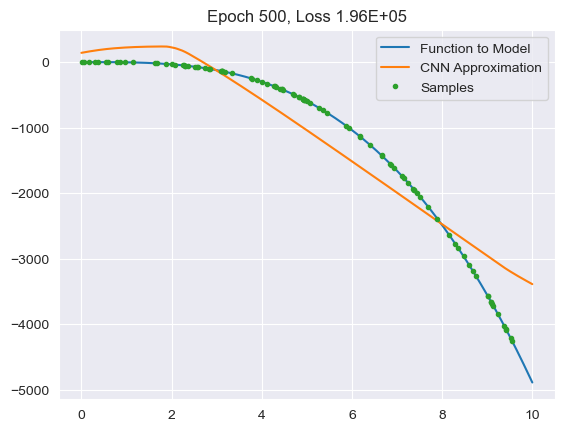

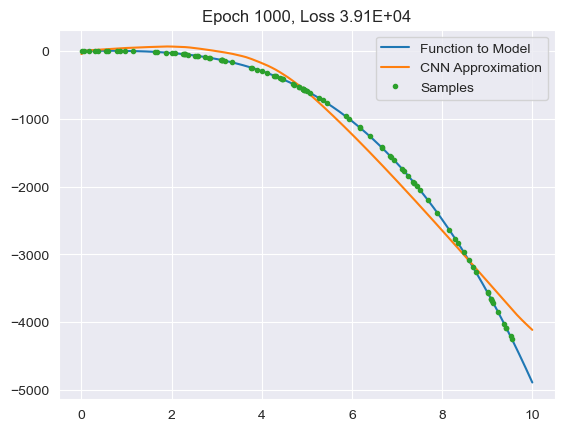

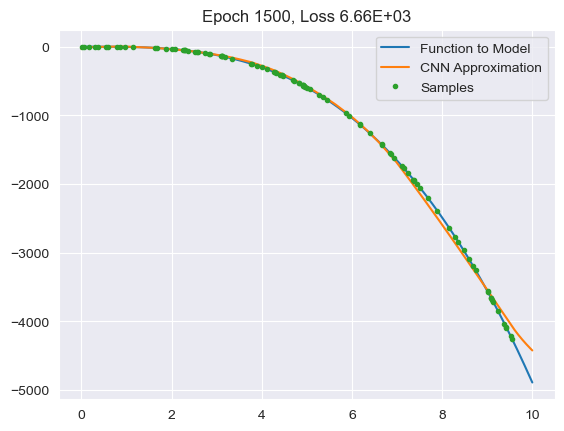

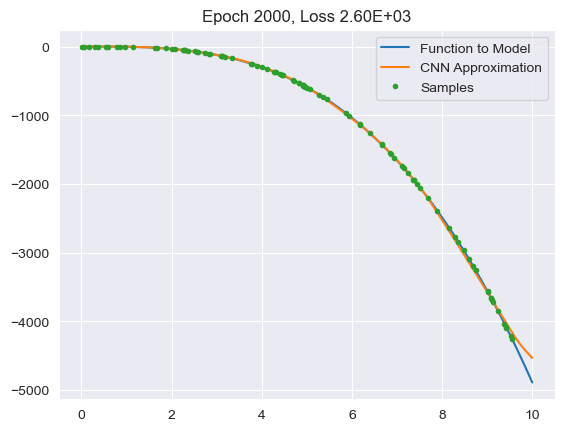

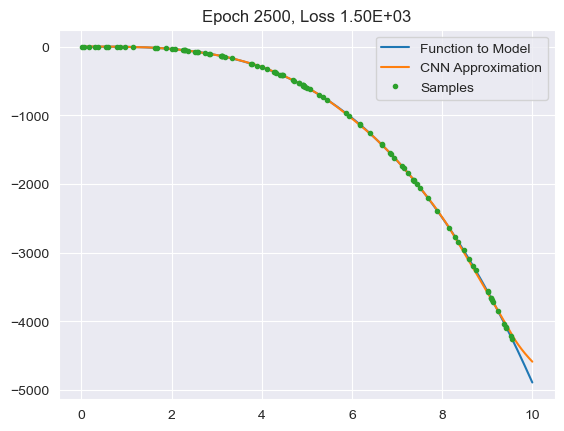

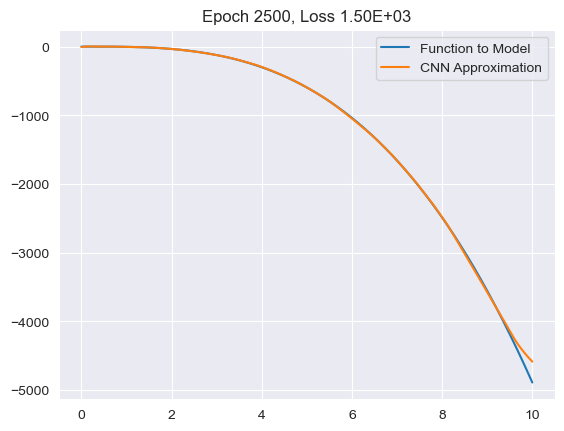

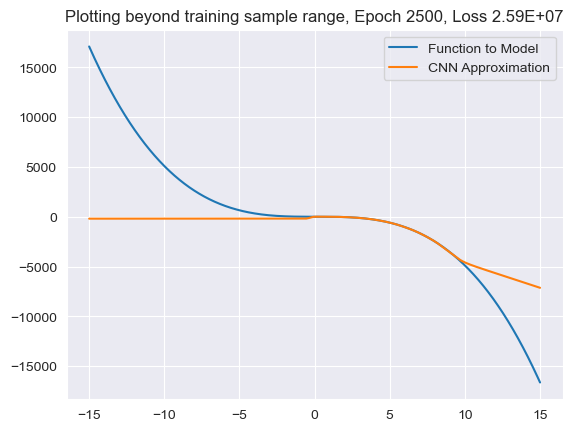

<Figure size 640x480 with 0 Axes>

In [22]:
n_epochs = 2501

for epoch in range(n_epochs):
    y_pred = model(X_sample)
    loss = loss_fn(y_pred, Y_sample)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if not (epoch%500):
        plot(0,10,'',1)
    #print(f'Finished epoch {epoch}, latest loss {loss}')

plot(0,10,'',0)
plot(-15,15,'Plotting beyond training sample range, ',0)

Plotting first derivative using autograd

In [23]:
#plot first derivatives over lower (l) to upper (u), with title (t), with bool (s) to display samples.
def plot_f1(l,u,t):
    n_step = 1000

    X_plot = np.linspace(l,u,n_step)
    Y_plot = f_1(X_plot)

    #to obtain grads, requires_grad must be set to true
    X_temp = torch.linspace(l, u, steps=n_step, requires_grad=True).view(-1,1)
    Y_temp = torch.from_numpy(Y_plot).float().view(-1,1)

    #change y preds to deriv
    Y_preds = model(X_temp)
    Y_pred_plot = torch.reshape(Y_preds, (-1,)).detach().numpy()

    #differentiate output w.r.t. input, to grad_output order. Retaining graph allows the graph to be stored and not recalculated to be used subsequently.
    grads = torch.autograd.grad(outputs=Y_preds, inputs=X_temp, grad_outputs=torch.ones_like(Y_preds), retain_graph=True)[0]
    grad_plot = torch.reshape(grads, (-1,)).detach().numpy()

    loss_plot = loss_fn(grads, Y_temp)
    
    plt.plot(X_plot, Y_plot, X_plot, grad_plot)
    title = t + f"Epoch {epoch}, Loss {loss_plot:.2E}"
    plt.title(title)
    plt.legend(['Function to Model','CNN Approximation'])
    plt.show()
    plt.clf()

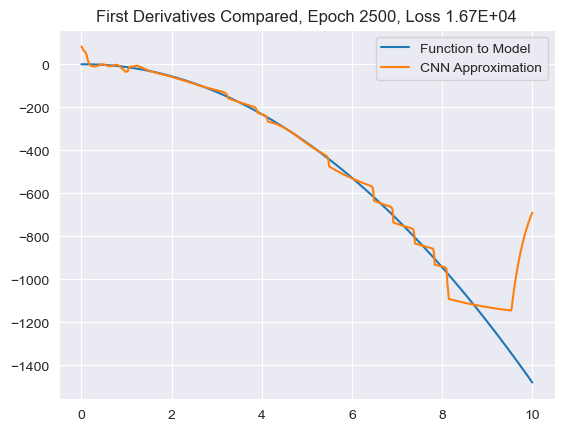

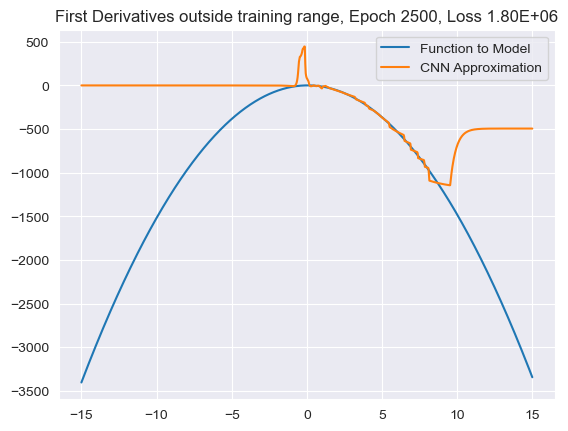

<Figure size 640x480 with 0 Axes>

In [24]:
plot_f1(0,10,'First Derivatives Compared, ')
plot_f1(-15,15,'First Derivatives outside training range, ')